In [11]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fully_conn_1 = nn.Linear(784, 256)
        self.fully_conn_2 = nn.Linear(256, 128)
        self.fully_conn_3 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10) # because of 10 output classes for numbers 0-9

        # self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):
        # Flatten images into 784 long vector
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fully_conn_1(x))
        x = F.relu(self.fully_conn_2(x))
        x = F.relu(self.fully_conn_3(x))

        # Use the following for testing with dropout of 0.2
        # x = self.dropout(F.relu(self.fully_conn_1(x)))
        # x = self.dropout(F.relu(self.fully_conn_2(x)))
        # x = self.dropout(F.relu(self.fully_conn_3(x)))
        x = F.log_softmax(self.output(x), dim=1)

        return x

learning_rate = 0.015
model = NeuralNet()
print(model)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()


NeuralNet(
  (fully_conn_1): Linear(in_features=784, out_features=256, bias=True)
  (fully_conn_2): Linear(in_features=256, out_features=128, bias=True)
  (fully_conn_3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
transformation = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,)),
                                    ])

train_data = torch.utils.data.DataLoader(datasets.MNIST(root="./data", train=True, download=True, transform=transformation), batch_size=128, shuffle=True)
test_data = torch.utils.data.DataLoader(datasets.MNIST(root="./data", train=False, download=True, transform=transformation), batch_size=128, shuffle=True)

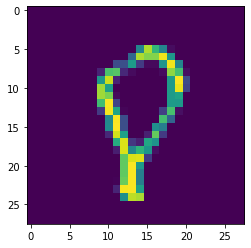

In [13]:
image, label = next(iter(train_data))

plt.imshow(np.transpose(image[0].numpy(), (1, 2, 0)))

In [14]:
print(f"Length of the trainset: {len(train_data)}")
print(f"Length of the testset: {len(test_data)}")

Length of the trainset: 469
Length of the testset: 79


In [15]:
epochs = 35
correct = 0

for epoch in range(epochs):
    train_loss = 0
    test_loss = 0
    model.train()
    for x, y in train_data:    
        optimizer.zero_grad()

        y_hat = model(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        model.eval()
    with torch.no_grad():
        for x, y in test_data:

            y_hat = model(x)
            loss = criterion(y_hat, y)

            test_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}          Train loss: {train_loss / len(train_data):.4f}          Validation loss: {test_loss/len(test_data):.4f}")
    print("---------------------------------------------------------------------------")

Epoch 1/35          Train loss: 1.4849          Validation loss: 0.5382
---------------------------------------------------------------------------
Epoch 2/35          Train loss: 0.4158          Validation loss: 0.3369
---------------------------------------------------------------------------
Epoch 3/35          Train loss: 0.3103          Validation loss: 0.2726
---------------------------------------------------------------------------
Epoch 4/35          Train loss: 0.2598          Validation loss: 0.2302
---------------------------------------------------------------------------
Epoch 5/35          Train loss: 0.2218          Validation loss: 0.2028
---------------------------------------------------------------------------
Epoch 6/35          Train loss: 0.1917          Validation loss: 0.1794
---------------------------------------------------------------------------
Epoch 7/35          Train loss: 0.1680          Validation loss: 0.1676
----------------------------------------

In [18]:
def test_nn(data, model):
    images, labels = next(iter(data))
    img = images[0].view(1, 784)
    probabilities = torch.exp(model(img))
    probablilites_finite = probabilities.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis("off")
    ax2.barh(np.arange(10), probablilites_finite)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1)

    plt.tight_layout()

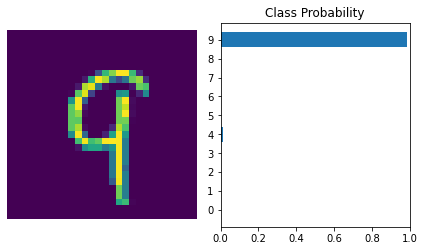

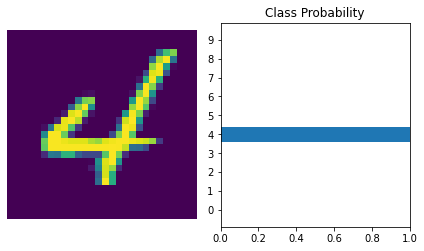

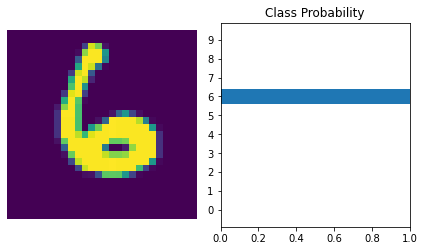

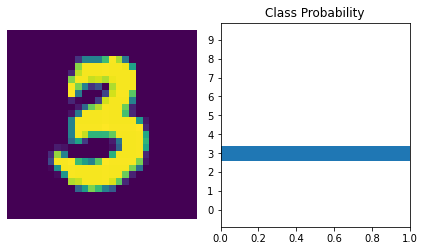

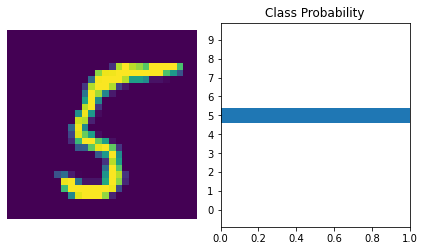

In [19]:
# Test the trained network 5 times

test_nn(train_data, model)
test_nn(train_data, model)
test_nn(train_data, model)
test_nn(train_data, model)
test_nn(train_data, model)
